In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In this project, I will work on Global terror dataset which is uploaded to kaggle by this link.
Dataset includes terrorist attacks occured in countries with detailed info.

In [2]:
df = pd.read_excel("Global_Terror_Data.xlsx")

In [3]:
df.head()

,id,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,CITY_LATITUDE,CITY_LONGITUDE,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,1,199603280007,1996,3,28,NaN,0,NaN,69,France,...,PGIS,-9.0,-9.0,0.0,-9.0,NaN,50.631368,3.065448,44.302692,5.956622
1,2,197412150001,1974,12,15,NaN,0,NaN,69,France,...,PGIS,0.0,1.0,1.0,1.0,NaN,48.847231,2.357168,44.302692,5.956622
2,3,199803070003,1998,3,7,NaN,0,NaN,6,Algeria,...,NaN,NaN,NaN,NaN,NaN,NaN,36.751932,3.048778,36.222000,3.396180
3,4,201405280068,2014,5,28,NaN,0,NaN,147,Nigeria,...,NaN,NaN,NaN,NaN,NaN,NaN,9.727778,8.835278,9.726631,10.146832
4,5,198704100014,1987,4,10,NaN,0,NaN,61,El Salvador,...,NaN,NaN,NaN,NaN,NaN,NaN,13.921389,-89.845000,13.722327,-88.928628


In [4]:
df.isna().sum()


id                        0
eventid                   0
iyear                     0
imonth                    0
iday                      0
                      ...  
related              155735
CITY_LATITUDE          2457
CITY_LONGITUDE         2457
COUNTRY_LATITUDE          1
COUNTRY_LONGITUDE         1
Length: 140, dtype: int64

In [ ]:
when we look at null values. It is obvious to see there are null value density on some columns.
but for now I will just drop columns with all values are null

In [5]:
df2 = df.dropna(how = "all", axis =1)

In [6]:
df2.head()

,id,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,CITY_LATITUDE,CITY_LONGITUDE,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,1,199603280007,1996,3,28,NaN,0,NaN,69,France,...,PGIS,-9.0,-9.0,0.0,-9.0,NaN,50.631368,3.065448,44.302692,5.956622
1,2,197412150001,1974,12,15,NaN,0,NaN,69,France,...,PGIS,0.0,1.0,1.0,1.0,NaN,48.847231,2.357168,44.302692,5.956622
2,3,199803070003,1998,3,7,NaN,0,NaN,6,Algeria,...,NaN,NaN,NaN,NaN,NaN,NaN,36.751932,3.048778,36.222000,3.396180
3,4,201405280068,2014,5,28,NaN,0,NaN,147,Nigeria,...,NaN,NaN,NaN,NaN,NaN,NaN,9.727778,8.835278,9.726631,10.146832
4,5,198704100014,1987,4,10,NaN,0,NaN,61,El Salvador,...,NaN,NaN,NaN,NaN,NaN,NaN,13.921389,-89.845000,13.722327,-88.928628


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170308 entries, 0 to 170307
Columns: 138 entries, id to COUNTRY_LONGITUDE
dtypes: float64(74), int64(8), object(56)
memory usage: 179.3+ MB


In [8]:
df2.describe()

,id,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,...,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,CITY_LATITUDE,CITY_LONGITUDE,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
count,170308.00000,1.703080e+05,170308.000000,170308.000000,170308.000000,170308.000000,170308.000000,170308.000000,165700.000000,165700.000000,...,6298.000000,5776.000000,132078.000000,132078.000000,132078.000000,132078.000000,167851.000000,167851.000000,170307.000000,170307.000000
mean,85154.50000,2.001779e+11,2001.712850,6.474446,15.466373,0.043639,132.528865,7.092022,23.410427,26.368195,...,4.522864,-25.784280,-5.037970,-4.991020,0.095428,-4.380389,23.378341,26.149718,23.162046,25.595407
std,49163.82916,1.314386e+09,13.143563,3.392432,8.818034,0.204290,112.858230,2.948872,18.834714,58.559535,...,2.048995,58.536597,4.508896,4.575497,0.632817,4.703719,18.320150,56.359294,18.656207,59.076109
min,1.00000,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,...,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000,-45.867889,-176.176447,-51.692214,-176.176447
25%,42577.75000,1.990053e+11,1990.000000,4.000000,8.000000,0.000000,75.000000,5.000000,11.277147,2.430000,...,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000,12.174262,4.351580,9.873664,3.396180
50%,85154.50000,2.007122e+11,2007.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.477477,43.130000,...,4.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000,30.199899,38.866058,30.466443,44.112054
75%,127731.25000,2.014023e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.745000,68.451613,...,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.451449,67.024612,33.975018,69.394667
max,170308.00000,2.017013e+11,2016.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,...,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000,74.633553,179.366667,64.588088,178.299338


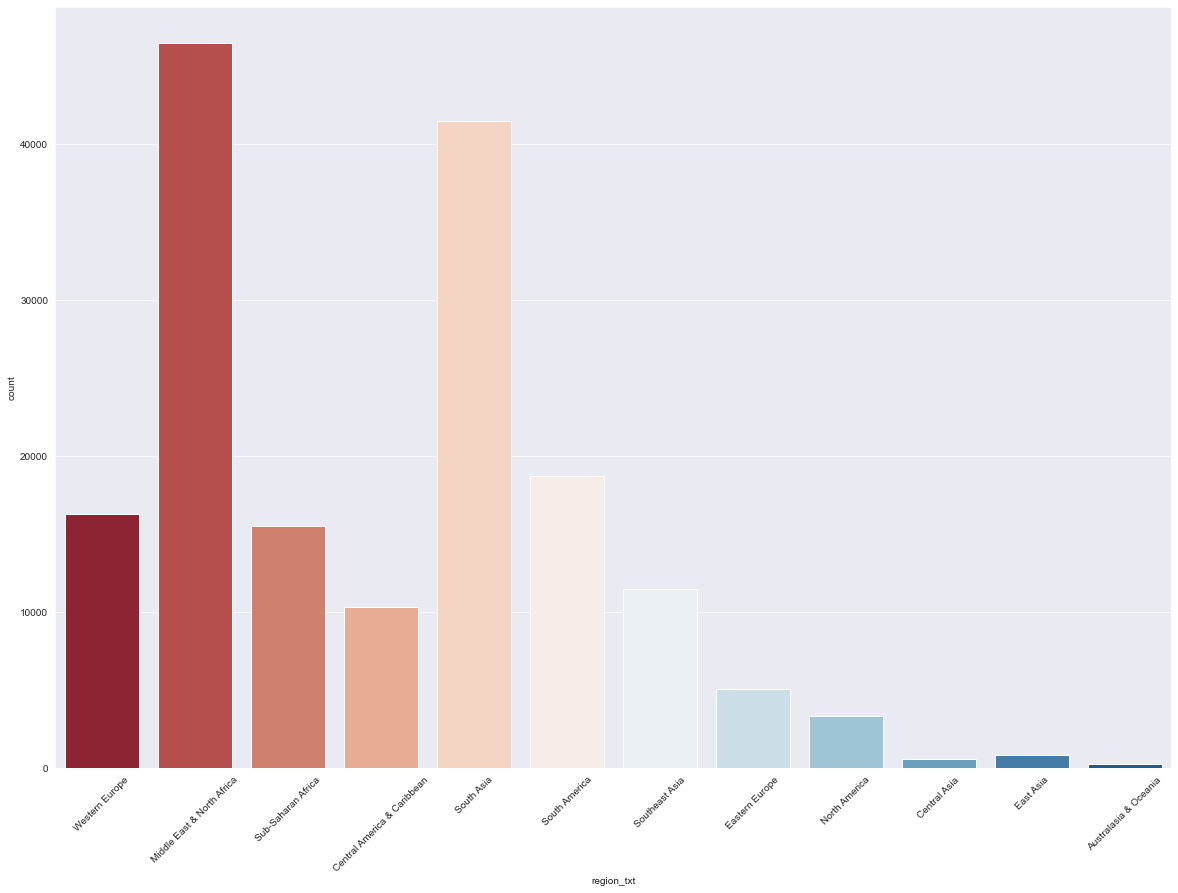

In [34]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(20,14))
sns.countplot(x = df2.region_txt,palette="RdBu")
plt.xticks(rotation=45);

now I want to add GDP per capita info to this dataset to see if there is a relatioship between attacks and economy.

In [37]:
df3=pd.read_csv("GDP.csv")

In [38]:
df3.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [57]:
my_list=[]
for i in df3['Country ']:
    if df2.country_txt.str.contains(i).any():
        my_list.append(i)
        

In [59]:
len(my_list)

159

In [61]:
len(df2.country_txt.unique())

205

In [47]:
df2.country_txt

0              France
1              France
2             Algeria
3             Nigeria
4         El Salvador
             ...     
170303           Iraq
170304          India
170305          Syria
170306           Iraq
170307           Iraq
Name: country_txt, Length: 170308, dtype: object

In [62]:
df3.rename(columns={"Country ": "country_txt"},inplace=True)

In [89]:
df3.tail()

,country_txt,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
255,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7782.875107,8222.285712,8547.652384,8903.763429,9194.741819,9781.019679,10208.857900,10756.663460,11348.363450,NaN
256,"Yemen, Rep.",YEM,2223.028771,2325.263661,2443.920401,2472.188808,2569.648739,2657.813447,2730.145147,2829.866193,...,4472.726448,3876.302619,3935.167105,4084.882967,4045.500031,3320.110156,2827.691023,2645.308383,2575.126385,NaN
257,South Africa,ZAF,6424.502215,6414.057923,6261.716184,6331.777580,6520.866604,6719.583315,7000.801619,7179.806651,...,11728.160490,12179.174190,12488.215570,12815.727070,13090.476830,13185.253280,13188.029620,13438.282890,13686.882360,NaN
258,Zambia,ZMB,1517.926292,1528.781247,1499.340446,1600.347799,1457.627696,1493.123972,1572.973238,1616.492883,...,3269.794329,3419.010460,3634.780353,3765.584162,3893.549478,3927.761816,3998.004435,4090.120040,4223.906936,NaN
259,Zimbabwe,ZWE,1829.677575,1949.732966,1777.843425,1807.225700,1986.028160,2004.362417,2227.060619,2303.829588,...,1888.566739,2168.110293,2534.541919,2583.985638,2648.568967,2679.580317,2687.385429,2825.725122,3029.793005,NaN


In [67]:
df4 = df2.merge(df3, how="inner",on ="country_txt")

now i have a dataset including terrorist attacks per countries and gdp values by years.

In [71]:
df4["1990"].describe()

count    137249.000000
mean       6145.428559
std        5615.099761
min         424.823989
25%        1983.002405
50%        4317.519756
75%        7498.159832
max       72906.520120
Name: 1990, dtype: float64

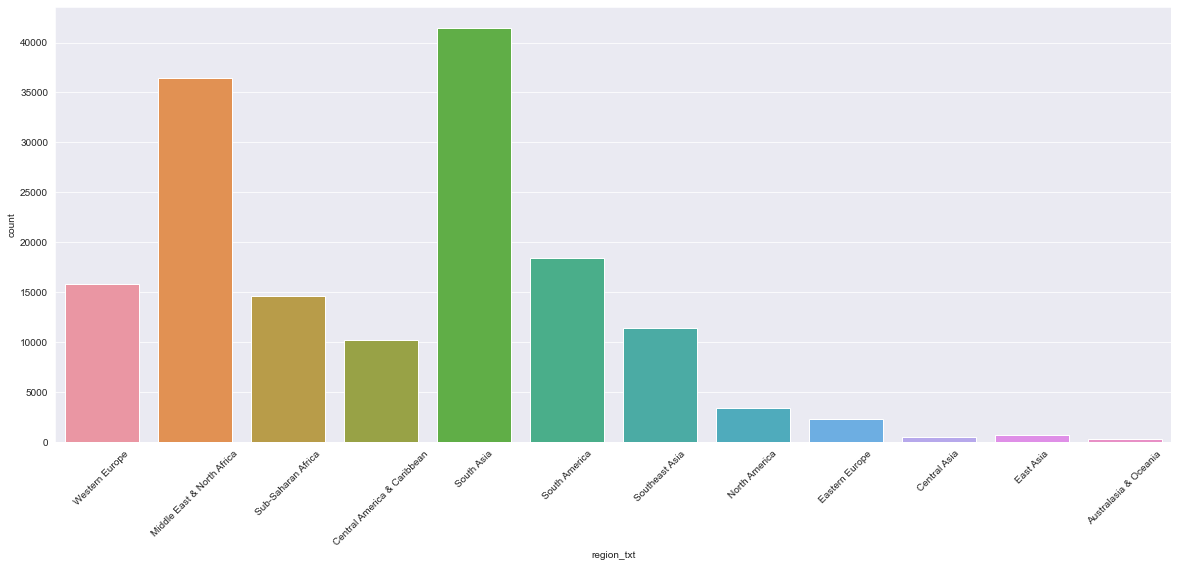

In [84]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(20,8))
h = sns.countplot(x=df4.region_txt)

plt.xticks(rotation=45);

<AxesSubplot:>

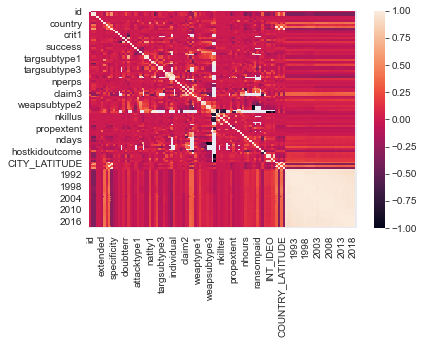

In [90]:
sns.heatmap(df4.corr())